 Using Titanic dataset V3.5 from http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.html

In [214]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import sklearn
from sklearn import datasets, svm, tree, preprocessing, metrics
from sklearn.model_selection import train_test_split 
#from sklearn import cross_validation
from sklearn.model_selection import cross_validate
import os
from sklearn.tree import DecisionTreeClassifier
import time

In [5]:
print(sklearn.__version__)

0.20.2


Skip the first 175 rows of #comments

In [87]:
titanic_df = pd.read_csv('titanic3.csv', skiprows = range(0, 174), delimiter=',', encoding="utf-8")

In [59]:
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [60]:
print(titanic_df.columns.tolist())
titanic_df[u"survived"].mean()

['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest']


0.3819709702062643

In [61]:
titanic_df.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159930,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [62]:
class_sex_grouping = titanic_df.groupby(['pclass','sex']).mean()
class_sex_grouping

survived        age     sibsp     parch        fare        body
pclass sex                                                                    
1      female  0.965278  37.037594  0.555556  0.472222  109.412385         NaN
       male    0.340782  41.029272  0.340782  0.279330   69.888385  162.828571
2      female  0.886792  27.499223  0.500000  0.650943   23.234827   52.000000
       male    0.146199  30.815380  0.327485  0.192982   19.904946  171.233333
3      female  0.490741  22.185329  0.791667  0.731481   15.324250  183.000000
       male    0.152130  25.962264  0.470588  0.255578   12.415462  151.854167

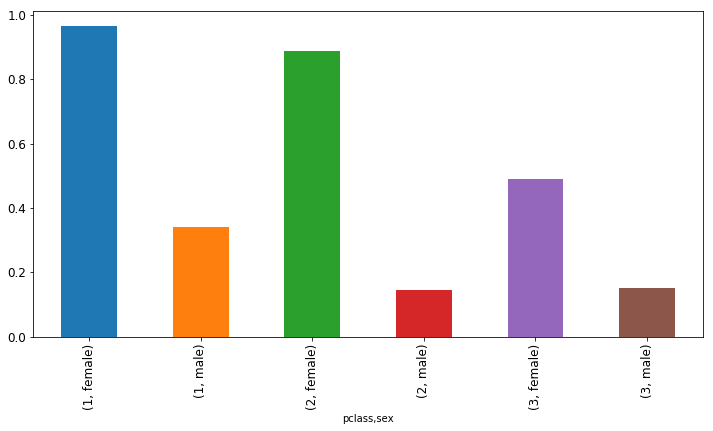

In [64]:
class_sex_grouping['survived'].plot.bar(figsize=(12, 6), fontsize=12)

# Trim the dataset
by removing data with missing values

In [72]:
titanic_df.info()
titanic_df.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


pclass       1309
survived     1309
name         1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin         295
embarked     1307
boat          486
body          121
home.dest     745
dtype: int64

In [88]:
titanic_df = titanic_df.drop(['body','cabin','boat','name','home.dest'], axis=1)
#Use axis=1 to drop the whole column

In [75]:
#titanic_df["home.dest"] = titanic_df["home.dest"].fillna("NA")
#fill the blanks with NA

In [76]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
embarked     1307 non-null object
home.dest    1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [84]:
titanic_df = titanic_df.dropna()
titanic_df.info()
titanic_df.count()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 0 to 1308
Data columns (total 8 columns):
pclass      1043 non-null int64
survived    1043 non-null int64
sex         1043 non-null object
age         1043 non-null float64
sibsp       1043 non-null int64
parch       1043 non-null int64
fare        1043 non-null float64
embarked    1043 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 73.3+ KB


pclass      1043
survived    1043
sex         1043
age         1043
sibsp       1043
parch       1043
fare        1043
embarked    1043
dtype: int64

In [90]:
titanic_df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,female,29.00,0,0,24160,211.3375,S
1,1,1,male,0.92,1,2,113781,151.5500,S
2,1,0,female,2.00,1,2,113781,151.5500,S
3,1,0,male,30.00,1,2,113781,151.5500,S
4,1,0,female,25.00,1,2,113781,151.5500,S


In [95]:
titanic_df['embarked'].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

914 people on board are from Southampton. RIP. 
C stands for Cherbourg. 
Q stands for Queenstown. 

# Preprocess the dataset
by converting strings to ints

In [177]:
def preprocess_titanic_df(dfi):
    processed_df = dfi.copy()
    #Copy (deep copy by default) to create a full-size second set of data
    #Shallow copy (deep=false) will create a pointer to the original data memory
    le = preprocessing.LabelEncoder()
    # Use label encoder to convert 'sex' and 'embarked' to numbers
    # then simply use fit_transform
    processed_df.sex = le.fit_transform(processed_df.sex)
    #processed_df.embarked=processed_df.embarked.fillna(np.nan)
    processed_df.embarked=processed_df.embarked.fillna('0', inplace=True)
    processed_df.embarked = le.fit_transform(processed_df.embarked)
    # drop 'ticket'
    processed_df = processed_df.drop(['ticket'],axis=1)
    return processed_df

In [200]:
df = preprocess_titanic_df(titanic_df)
df.replace(['NaN', 'NaT'], np.nan, inplace = True)
# string type of 'NaN' exist! Replace with np.nan (to works with dropna)
#df = df[~df.isin(['NaN', 'NaT']).any(axis=1)]
df=df.dropna(axis=0)
print(df)
df = df.reset_index()
#When sklearn with pandas, sometimes ValueError: Input contains NaN, infinity or a value too large for dtype('float64') happens
#Use df = df.reset_index() to resolve it

      pclass  survived  sex    age  sibsp  parch      fare  embarked
0          1         1    0  29.00      0      0  211.3375         0
1          1         1    1   0.92      1      2  151.5500         0
2          1         0    0   2.00      1      2  151.5500         0
3          1         0    1  30.00      1      2  151.5500         0
4          1         0    0  25.00      1      2  151.5500         0
5          1         1    1  48.00      0      0   26.5500         0
6          1         1    0  63.00      1      0   77.9583         0
7          1         0    1  39.00      0      0    0.0000         0
8          1         1    0  53.00      2      0   51.4792         0
9          1         0    1  71.00      0      0   49.5042         0
10         1         0    1  47.00      1      0  227.5250         0
11         1         1    0  18.00      1      0  227.5250         0
12         1         1    0  24.00      0      0   69.3000         0
13         1         1    0  26.00

In [179]:
#Here shows the error in the case that there are missing data present
#TypeError: unorderable types: str() < float()
#The solution is to fill na with 'NaN'
#processed_df.embarked=processed_df.embarked.fillna(np.nan)
#Do not use .fillna(0)
# Use .fillna(0, inplace=True) 
# see the function defined above.
a = preprocessing.LabelEncoder().fit_transform(titanic_df.embarked)

TypeError: unorderable types: str() < float()

In [194]:
X = df.drop(['survived'], axis=1).values
y = df['survived'].values

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [196]:
print(X_train.shape)
print(X_test.shape)
print(X_train.shape[0] / X_test.shape[0])

(836, 8)
(209, 8)
4.0


In [197]:
np.random.seed(9980)

In [198]:
clf_dt = DecisionTreeClassifier(max_depth=10)
#Decision tree classifier

In [199]:
clf_dt.fit(X_train, y_train)
clf_dt.score(X_test, y_test)

0.7751196172248804

In [207]:
np.random.seed(42)

shuffle_validator = sklearn.model_selection.ShuffleSplit(len(X), test_size=0.2, random_state=0)

def test_classifier(clf):
    scores = sklearn.model_selection.cross_val_score(clf, X, y, cv=shuffle_validator)
    print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std()))

In [223]:
t0 = time.clock()
test_classifier(clf_dt)
print('Elapsed time: ' + str(time.clock()-t0) + 's')

Accuracy: 0.7608 (+/- 0.03)
Elapsed time: 2.509231289406955s


In [224]:
#Gradient Boosting Classifier
clf_rf = sklearn.ensemble.GradientBoostingClassifier(n_estimators=50)
t0 = time.clock()
test_classifier(clf_rf)
print('Elapsed time: ' + str(time.clock()-t0) + 's')

Accuracy: 0.8108 (+/- 0.03)
Elapsed time: 39.39494974761641s


In [225]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
#Random forest classifier
clf = RandomForestClassifier(n_estimators=50)
clf = clf.fit(X_train, y_train)
t0 = time.clock()
test_classifier(clf)
print('Elapsed time: ' + str(time.clock()-t0) + 's')

Accuracy: 0.7882 (+/- 0.02)
Elapsed time: 63.745005625956196s


[0.26916276 0.         0.52973721 0.10730559 0.03010849 0.00387386
 0.05981209 0.        ]


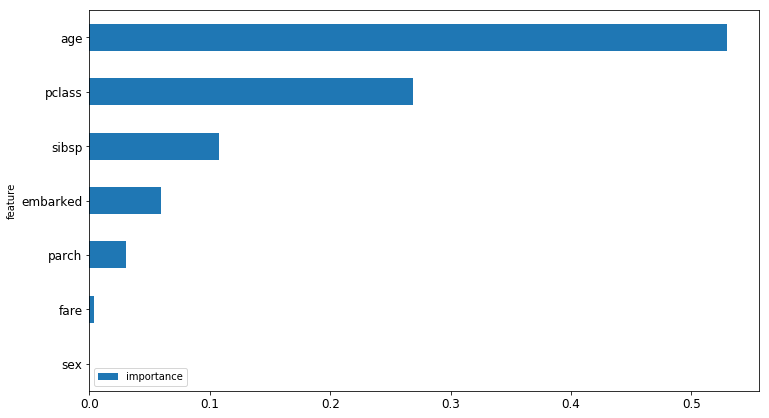

In [237]:
features = pd.DataFrame()
clf_rf.fit(X_train, y_train)
clf_rf.score(X_test, y_test)
features['feature'] = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
print(clf_rf.feature_importances_)

features['importance'] = clf_rf.feature_importances_[:-1]
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(12, 7), fontsize=12)
plt.show()